In [18]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


from sklearn.ensemble import RandomForestClassifier

In [19]:
data= pd.read_csv('/Users/ujas/Downloads/training.csv')

/var/folders/s8/s6sf02997yx31ry1w57gp3sw0000gn/T/ipykernel_92324/2488345545.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('/Users/ujas/Downloads/training.csv')


In [20]:
data.dropna(inplace = True)
data = data[data.UUC != '-']
data = data[(data.UUU != 'non-B hepatitis virus')]



data.UUU = data.UUU.astype('float')
data.UUC = data.UUC.astype('float')

In [4]:
data

,id,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,1,pln,0.0,3886,4181,Phaseolus coccineus,0.02392,0.02966,0.00765,0.01794,...,0.00167,0.00789,0.01315,0.02966,0.02631,0.02822,0.02727,0.00096,0.00191,0.00144
1,2,arc,0.0,146920,1716,Acidianus tengchongenses,0.01748,0.01049,0.05361,0.01282,...,0.00000,0.03322,0.00524,0.04429,0.01340,0.05769,0.02214,0.00233,0.00000,0.00000
2,3,vrl,0.0,220938,1103,Tomato yellow leaf curl virus-[Almeria],0.02357,0.02267,0.01632,0.01088,...,0.00363,0.01995,0.01632,0.03083,0.01813,0.02992,0.01904,0.00363,0.00091,0.00091
3,4,pln,1.0,35128,9379,mitochondrion Thalassiosira pseudonana,0.07080,0.01397,0.07389,0.01685,...,0.00235,0.01386,0.00213,0.02143,0.00618,0.02506,0.00533,0.00341,0.00032,0.00661
4,5,rod,1.0,9995,1520,mitochondrion Marmota monax,0.04671,0.02632,0.03421,0.00000,...,0.00197,0.00263,0.00000,0.01053,0.01842,0.01382,0.00197,0.00000,0.00000,0.02895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,10214,vrl,0.0,390237,3057,White lupin mosaic virus,0.02781,0.01897,0.01505,0.02715,...,0.00327,0.02126,0.01505,0.03369,0.02126,0.03467,0.03042,0.00000,0.00033,0.00000
10214,10215,vrl,0.0,284687,3646,Amasya cherry disease associated chrysovirus,0.00905,0.01865,0.00521,0.02030,...,0.00329,0.01920,0.02935,0.03428,0.03209,0.03291,0.03922,0.00110,0.00000,0.00000
10215,10216,pln,0.0,3721,1289,Crambe hispanica subsp. abyssinica,0.02560,0.02250,0.01164,0.01939,...,0.00543,0.01707,0.00155,0.02793,0.01707,0.01552,0.02560,0.00233,0.00000,0.00000
10216,10217,pln,0.0,36902,11065,Medicago sativa subsp. x varia,0.02178,0.01663,0.01175,0.02332,...,0.00307,0.01654,0.01347,0.04058,0.01943,0.03145,0.02919,0.00117,0.00081,0.00081


In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Kingdom','id','SpeciesID','SpeciesName','DNAtype'], axis = 1),
                                                    data.Kingdom,
                                                    test_size = 0.2)

In [230]:
X_train.Ncodons = (X_train.Ncodons-X_train.Ncodons.mean() )/ X_train.Ncodons.std()
# X_train.DNAtype = (X_train.DNAtype-X_train.DNAtype.mean() )/ X_train.DNAtype.std()

X_test.Ncodons = (X_test.Ncodons-X_test.Ncodons.mean() )/ X_test.Ncodons.std()
# X_test.DNAtype = (X_test.DNAtype-X_test.DNAtype.mean() )/ X_test.DNAtype.std()

In [142]:
rf = RandomForestClassifier(max_depth=20)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [143]:
rf_preds = rf.predict(X_test)

accuracy_score(rf_preds, y_test)

0.8790993636808615

In [47]:
svm = SVC(kernel='rbf', degree=2, C=50) #tune C

In [48]:
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_test)
accuracy_score(svm_preds,y_test)

0.8595203132648067

# KNN

In [22]:
X_train = (X_train- X_train.mean()) / X_train.std()
X_test = (X_test- X_test.mean()) / X_test.std()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
to_plot=[]
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', algorithm = 'brute', metric='cosine')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    to_plot.append([i,accuracy_score(preds, y_test)])
    print(i, accuracy_score(preds, y_test))

1 0.9324522760646109
2 0.9324522760646109
3 0.9285364659813999
4 0.9300048947626041
5 0.922173274596182
6 0.9231522271169849
7 0.9197258932941752
8 0.9182574645129711
9 0.9187469407733725
10 0.9177679882525698
11 0.9172785119921684
12 0.9153206069505629
13 0.9133627019089574
14 0.9099363680861479
15 0.9065100342633382
16 0.9069995105237396
17 0.9079784630445423
18 0.9065100342633382
19 0.9050416054821341


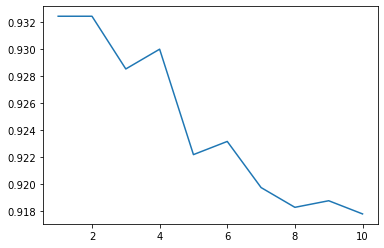

In [36]:
import matplotlib.pyplot as plt
to_plot = pd.DataFrame(to_plot)

plt.plot(to_plot.iloc[:10,0],to_plot.iloc[:10,1])

In [34]:
to_plot.iloc[:,0]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
Name: 0, dtype: int64

In [193]:
x = data.drop(['Kingdom','id','SpeciesID','SpeciesName','DNAtype'], axis = 1)

In [194]:
x = (x - x.mean()) / x.std()

In [196]:
knn_final = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', algorithm = 'brute', metric='cosine')

In [197]:
knn_final.fit(x, data.Kingdom)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_neighbors=4,
                     weights='distance')

In [210]:
test = pd.read_csv('/Users/ujas/Downloads/testing.csv')
op = pd.DataFrame(columns = ['id', 'Kingdom'])
op.id = test.id
test = test.drop(['id','SpeciesID','SpeciesName','DNAtype'], axis = 1)

In [211]:
test = (test - test.mean()) / test.std()

In [212]:
knn_preds = knn_final.predict(test)

In [213]:
pd.Series(knn_preds).value_counts()

bct    646
vrl    595
pln    577
vrt    455
inv    244
mam    134
rod     49
phg     48
pri     38
arc     23
plm      1
dtype: int64

In [215]:
op.Kingdom = knn_preds

In [219]:
op.to_csv('/Users/ujas/Downloads/submissions.csv', index = False)

# Dimension reduction

In [13]:
data = pd.read_csv("/Users/ujas/Downloads/training_data_aminoAcid (1).csv")

# data.dropna(inplace = True)
# data = data[data.UUC != '-']
# data = data[(data.UUU != 'non-B hepatitis virus')]

# data.UUU = data.UUU.astype('float')
# data.UUC = data.UUC.astype('float')

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Kingdom','id','SpeciesID','SpeciesName','DNAtype'], axis = 1),
                                                    data.Kingdom,
                                                    test_size = 0.2)




In [8]:
y_train

1673    bct
9700    pln
9174    rod
1216    inv
7591    vrl
       ... 
9428    vrt
8078    pri
3561    phg
1011    bct
6112    vrt
Name: Kingdom, Length: 8172, dtype: object

In [247]:
for i,j in enumerate(data.Phenylalanine):
    print(j)
#     try:
#         float(i)
#     except:
        

0.023920.02966
0.017480.01049
0.023570.02267
0.07080.01397
0.046710.02632
0.020690.01014
0.065410.02241
0.050490.0228
0.022710.01817
0.056210.00676
0.008760.02229
0.021150.01668
0.040550.0231
0.0360.03
0.031620.00593
0.019010.0142
0.007720.02936
0.033370.02259
0.022980.02617
0.033810.01056
0.021080.03087
0.041280.00648
0.028690.01967
0.030580.0231
0.02260.01989
0.021140.02819
0.056750.02153
0.012160.04157
0.010530.06579
0.019480.03896
0.035540.01875
0.007030.02573
0.013590.01721
0.012030.03038
0.013150.02078
0.016270.02919
0.021850.02185
0.015610.02689
00.04216
0.014710.00735
0.020580.03567
0.024390.01067
0.015580.02666
0.123030.00699
0.000720.02508
0.031140.01007
0.023280.0099
00.01937
0.007890.04736
0.032440.00681
0.025770.01384
0.038730.01256
0.006950.01158
0.001650.0285
0.01910.02792
0.022020.04486
0.033310.01109
0.003790.03238
0.028470.01398
0.023940.01122
0.039380.02844
0.0240.02751
0.01750.01678
0.01490.0201
0.037010.01102
0.015190.03466
0.016350.01877
0.019930.02083
0.023410.01

0.032150.02061
0.021890.02277
0.02330.0201
0.045860.01055
0.034540.02225
0.013190.02637
0.063710.0194
0.032780.01159
0.001280.02316
0.030160.00981
0.011610.02086
0.015830.02033
0.032930.01497
0.019240.0379
0.019380.01479
0.122190.00343
0.008940.02981
0.023760.01612
0.027550.01899
0.008090.01954
0.01240.02135
0.042460.00772
0.009010.02571
0.027190.01654
0.027950.01815
0.019610.02135
0.022640.02104
0.02940.03298
0.017190.02715
0.008090.03354
0.038320.02784
0.015560.01742
0.009220.01449
0.022420.0158
0.015590.02133
0.011250.00917
0.020.02647
0.003940.02688
0.017970.03853
0.025230.01433
0.023290.01198
0.044220.00668
0.088850.00841
0.018130.02811
0.031580.03246
0.014110.01847
0.047450.01745
0.068380.00592
0.011390.02277
0.036540.02099
0.012840.02087
0.038630.03687
0.029630.01111
0.018060.0197
0.028680.01115
0.008610.04878
0.008590.02039
0.016150.02531
0.01470.01485
0.000540.01813
0.02490.01437
0.006660.05848
0.038630.00501
0.03060.01641
00.01938
0.014270.02308
0.027430.01654
0.020440.02044


0.01890.01299
0.035190.01227
0.01440.0108
0.031840.02987
0.024030.01818
0.026680.03177
0.041910.0214
0.049630.00915
0.026170.0119
0.030450.01162
0.016180.02229
0.029220.03388
0.015490.02796
0.019020.0286
0.008920.02195
0.040690.03466
0.015050.04463
00.03458
0.013640.01801
0.012330.02332
0.043840.03168
0.027820.01351
0.018250.03058
0.025370.02261
0.055670.02783
0.005020.03126
0.092240.02286
0.011780.05672
0.018850.02049
0.032370.01206
0.026780.02339
0.029360.02936
0.032590.01199
0.015240.02539
0.012030.03033
0.002070.0188
0.023640.03111
0.034270.00685
0.028950.04211
0.027060.0073
0.004720.02763
0.029410.01407
0.006260.02236
0.003920.0285
0.012550.02602
0.011420.03965
0.084780.02505
0.011840.02476
0.027910.01444
0.029910.02707
0.035180.02811
0.032690.01219
0.047550.01845
0.098040.0084
0.00660.02794
0.01920.02007
0.016570.03039
0.041360.01156
0.016770.01183
0.00480.02256
0.020420.01926
0.068970.01675
0.037890.01784
0.016410.04577
0.062860.01905
0.00530.01312
0.035890.03646
0.010570.02887


0.003240.02232
0.115950.00465
0.021190.01868
0.017270.0336
0.00510.02431
0.037570.00704
0.007890.03631
0.060310.02335
0.02340.01315
0.00050.02906
0.00140.0228
0.034080.0209
0.024840.0355
0.014080.01889
0.003850.03661
0.026030.0127
0.016510.01832
0.009910.02513
0.020040.01234
0.004740.02607
0.032970.0143
0.008650.02017
0.014520.01686
0.034120.01504
0.030510.00673
0.012290.02016
0.031770.02366
0.024410.04439
0.00720.02646
0.023680.03359
0.025880.01822
0.023630.01996
0.018880.01457
0.012040.00556
0.074290.02315
0.017890.01548
0.025720.01426
0.029410.01423
0.031060.0168
0.01520.019
0.021050.05526
0.021760.02448
0.015530.01973
0.008520.01346
0.070590.01961
0.027180.02432
0.022160.04266
0.017350.02366
0.017240.02384
0.027890.01441
0.010750.01188
0.024550.03717
0.048530.01978
0.026910.01544
0.017840.02676
0.10090.01433
0.025830.01471
0.003410.03756
0.034850.01271
0.0190.02578
0.025410.02132
0.009640.03685
0.013420.02261
0.008790.01506
0.01360.02345
0.014530.02972
0.025310.02088
0.020870.01675

0.0080.01883
0.020710.01379
0.030270.02775
0.032240.01847
0.007490.03776
0.005690.04744
0.034380.0278
0.03060.0194
0.034830.01955
0.022560.02782
0.003330.02884
0.011820.02299
0.007520.02029
0.024370.01258
0.012720.04505
0.020340.013
0.016790.03228
0.023770.03332
0.039070.02855
0.028920.01645
0.02250.01607
0.028390.01471
0.005270.03389
0.028230.01134
0.063120.02553
0.014410.02594
0.021490.04693
0.039660.01579
0.00990.02687
0.00280.04047
0.026340.02058
0.025970.02013
0.017750.04734
0.024560.00677
0.02840.01411
0.029020.00912
0.009020.05299
0.014220.02681
0.031980.0121
0.049770.01878
0.027630.02009
0.020010.02082
0.014120.02278
0.002390.03184
0.026220.01956
0.023880.02303
0.11910.0111
0.015170.02902
0.03170.01331
0.086870.01052
0.000850.04078
0.023920.01544
0.020610.0178
0.049230.01735
0.01930.02193
0.017320.0237
0.005420.02748
0.047220.01441
0.031580.02211
0.027750.04067
0.011660.02867
0.021030.00847
0.014480.02124
0.023320.02323
00.01754
0.04020.02642
0.007690.02203
0.016380.0275
0.0256

0.024450.01392
0.002180.02389
0.03090.02704
0.046180.01911
0.015090.06102
0.000480.03391
0.023040.04271
0.018130.01264
0.032510.01497
0.001660.02767
0.005760.0317
0.025560.01982
0.003130.02662
0.073320.01556
0.02220.01867
0.017840.02413
0.023580.01984
0.035180.02129
0.010780.01797
0.006580.01131
0.020910.01901
0.024910.02128
0.027720.03355
0.015670.01176
0.017030.01196
0.001160.03387
0.00390.03267
0.040950.00661
0.014760.01867
0.091270.00827
0.009940.02433
0.027910.01637
0.026320.03902
0.020.04316
0.025480.02166
0.038140.02456
0.018640.04822
0.001650.02898
0.029320.04144
0.058130.0167
0.014310.02249
0.011530.02867
0.003230.02745
0.030560.00669
0.017790.01423
0.034510.02743
0.009980.02524
0.0180.0108
0.019880.02274
0.011050.02622
0.029370.01238
0.002920.021
0.041880.00973
0.012990.05787
0.035190.02463
0.009270.02719
0.022830.01991
0.005760.0317
0.010170.04797
0.018040.01961
0.024770.04708
0.017640.0051
0.034950.02561
0.026940.03418
0.004990.03888
0.014110.01847
0.010480.00419
0.004240.0

0.042679999999999996
0.07468
0.04297
0.09824
0.04458
0.03569
0.021580000000000002
0.05222
0.039400000000000004
0.07797000000000001
0.042609999999999995
0.04485
0.06686
0.04046
0.03749
0.03468
0.03376
0.033600000000000005
0.09039
0.08557
0.04199
0.040709999999999996
0.03244
0.03242
0.05118
0.04494
0.025959999999999997
0.046799999999999994
0.02965
0.05942
0.044770000000000004
0.03183
0.04124
0.08682999999999999
0.04361
0.05058
0.04245
0.039189999999999996
0.0458
0.048029999999999996
0.04585
0.04659
0.03757
0.06427000000000001
0.03966
0.07086
0.046329999999999996
0.04877
0.04271
0.04735
0.03523
0.02717
0.055
0.08267
0.054099999999999995
0.040080000000000005
0.06337
0.051379999999999995
0.04306
0.038470000000000004
0.05198
0.03203
0.07924
0.050449999999999995
0.04154
0.08399
0.03895
0.04036
0.059719999999999995
0.07117
0.037489999999999996
0.05731
0.08786000000000001
0.04138
0.04303
0.029470000000000003
0.036989999999999995
0.046130000000000004
0.03707
0.030039999999999997
0.06186999999999

0.04533
0.031100000000000003
0.02765
0.02272
0.051949999999999996
0.022889999999999997
0.0451
0.03596
0.038
0.06552
0.04608
0.0395
0.044829999999999995
0.06996
0.02393
0.14231
0.043
0.045849999999999995
0.05821
0.0365
0.032490000000000005
0.05091
0.03777
0.04348
0.04759
0.04455
0.04428
0.04045
0.04419
0.0789
0.044590000000000005
0.03594
0.04478
0.04639
0.03058
0.02984
0.01354
0.05013
0.03579
0.04076
0.03973
0.06246
0.08660999999999999
0.06062
0.052360000000000004
0.0392
0.04253
0.03652
0.0387
0.11209
0.04342
0.049550000000000004
0.03712
0.05287
0.06567
0.03548
0.04537
0.0693
0.04227
0.047920000000000004
0.04288
0.0708
0.05577
0.0287
0.03552
0.04572
0.04045
0.03941
0.04451
0.07063
0.03959
0.05562
0.03974
0.02935
0.04758999999999999
0.07162
0.0476
0.04968
0.03746
0.06561
0.03397
0.046579999999999996
0.040429999999999994
0.06492
0.03779
0.04184
0.04202
0.04291
0.0395
0.06596
0.03539
0.03291
0.05746
0.04154
0.02661
0.02834
0.040870000000000004
0.037610000000000005
0.041550000000000004
0.04

# XG Boost

In [6]:
import xgboost as xgb

/Users/ujas/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = []
train_XG = []
rep_string = {
    'arc': 0,
    'bct': 1, 'inv':2, 'mam':3, 'phg':4, 'plm':5, 'pln':6, 'pri':7, 'rod':8, 'vrl':9, 'vrt':10
}
y_train = y_train.replace(rep_string)
y_test = y_test.replace(rep_string)
for lr in learning_rate_range:
    print(lr)
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(x_train, y_train)
    train_XG.append(xgb_classifier.score(x_train, y_train))
    test_XG.append(xgb_classifier.score(x_test, y_test))

In [ ]:
xgb_classifier = xgb.XGBClassifier(eta = 0.26)
xgb_classifier.fit(X_train, y_train)